In [86]:
from fbg import FBG
from config import *
import numpy as np
import matplotlib.pyplot as plt
from apodization import gaussianFunc, hammingFunc
import math

(1.542, 1.546)

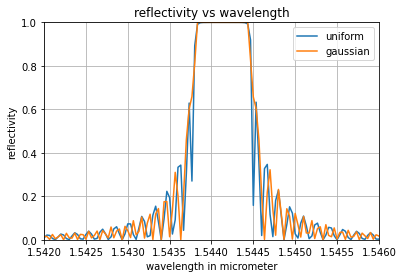

In [40]:
l = 5000
dn = 0.0007
n0 = 1.4415
neta = 0.85
pitch = 0.5356
n = 11
uniFbg = FBG(nSamples)
uniFbg.push(l=l, dn=dn, n0=n0, neta=neta, pitch=pitch)

l = 15000
gaussFbg = FBG(nSamples)
# 11 uniform segments
for _ in range(n):
    gaussFbg.push(l=l/n, dn=dn, n0=n0, neta=neta, pitch=pitch)

gaussFbg.setApodization(hammingFunc)

x = uniFbg.getFunctionSamples(xRange.min, xRange.max)[0]
plt.plot(x, uniFbg.getFunctionSamples(xRange.min, xRange.max)[1])
plt.plot(x, gaussFbg.getFunctionSamples(xRange.min, xRange.max)[1])

plt.legend(["uniform", "gaussian"], loc='upper right')
plt.xlabel("wavelength in micrometer")
plt.ylabel("reflectivity")
plt.title("reflectivity vs wavelength")
plt.grid()
axes = plt.gca()
axes.set_ylim([0, 1])
axes.set_xlim([1.542, 1.546])

In [169]:
def gauss(mu, sigma, x):
    return math.exp(-(((x-mu)/sigma)**2))

def raisedCosine(mu, x, sigma):
    '''
    alpha : raised cosine parameter
    '''
    alpha = 0.5
    return math.cos(math.pi*(x-mu)/sigma)
    return alpha*(1+math.cos(math.pi*(x-mu)/sigma))

def sinc(mu, sigma, x):
    k = (x-mu)/sigma
    
    if k == 0:
        return 1/sigma
    
    return math.sin(k)/k

(1.542, 1.546)

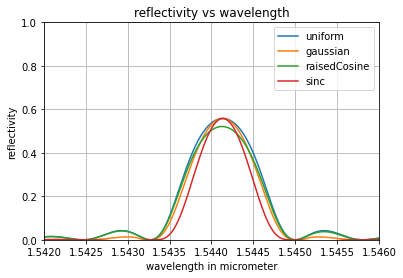

In [196]:
l = 5000
dn = 0.0005
n0 = 1.4415
neta = 0.95
pitch = 0.5356
lB = 1.5441348

uniFbg = FBG(500)
uniFbg.push(l=l, dn=dn, n0=n0, neta=neta, pitch=pitch)

x, y = uniFbg.getFunctionSamples(xRange.min, xRange.max)
plt.plot(x, y)

gaussApod = [gauss(mu=lB, sigma=0.0011, x=x[i])*y[i] for i in range(len(x))]
plt.plot(x, gaussApod)

raisedCosineApod = [raisedCosine(mu=lB, sigma=0.00000000000016, x=x[i])*y[i] for i in range(len(x))]
plt.plot(x, raisedCosineApod)

sincApod = [sinc(mu=lB, sigma=0.00025, x=x[i])*y[i] for i in range(len(x))]
plt.plot(x, sincApod)

plt.legend(["uniform", "gaussian", "raisedCosine", "sinc"], loc='upper right')
plt.xlabel("wavelength in micrometer")
plt.ylabel("reflectivity")
plt.title("reflectivity vs wavelength")
plt.grid()
axes = plt.gca()
axes.set_ylim([0, 1])
axes.set_xlim([1.542, 1.546])

In [78]:
type(x)

list